In [1]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
poke = pd.read_csv('Pokemon.csv', index_col = 'pokedex_number')

I want to break down the pokemon to try and find the best typings when it comes to total stats to see if pokemon are well balanced

In [3]:
poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [22]:
poke.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [23]:
cols = poke.columns.tolist()

In [24]:
cols

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

In [35]:
reordered_cols = cols[30:31] + cols[0:1] + cols[37:38] + cols[27:28] + cols[35:37] + cols[38:40] + cols[28:29] + cols[19:20] + cols[25:26] + cols[32:35] + cols[22:25] + cols[1:19]



In [36]:
poke = poke[reordered_cols]

In [46]:
poke.columns

Index(['name', 'abilities', 'weight_kg', 'height_m', 'type1', 'type2',
       'generation', 'is_legendary', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'base_total', 'capture_rate', 'classfication',
       'against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water'],
      dtype='object')

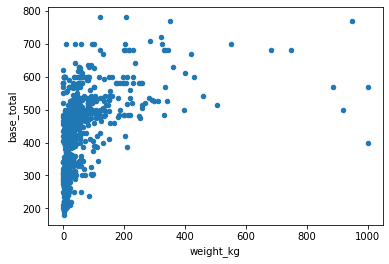

In [40]:
poke.plot.scatter(x = 'weight_kg', y = 'base_total')

In [55]:
poke[poke.columns[0:15]].corr(method = 'pearson')

,weight_kg,height_m,generation,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed,base_total
weight_kg,1.000000,0.626551,0.085767,0.393023,0.427743,0.382183,0.424067,0.245218,0.306523,0.051384,0.458111
height_m,0.626551,1.000000,-0.025525,0.322155,0.478369,0.423160,0.361938,0.353007,0.328327,0.202202,0.535063
generation,0.085767,-0.025525,1.000000,0.139029,0.074065,0.101375,0.057603,0.070146,0.048711,-0.019914,0.084358
is_legendary,0.393023,0.322155,0.139029,1.000000,0.308405,0.303295,0.265587,0.406281,0.343241,0.311639,0.485440
hp,0.427743,0.478369,0.074065,0.308405,1.000000,0.410616,0.242378,0.365973,0.366971,0.160760,0.620624
attack,0.382183,0.423160,0.101375,0.303295,0.410616,1.000000,0.468915,0.368154,0.265836,0.352703,0.730134
defense,0.424067,0.361938,0.057603,0.265587,0.242378,0.468915,1.000000,0.241882,0.526348,0.007934,0.629620
sp_attack,0.245218,0.353007,0.070146,0.406281,0.365973,0.368154,0.241882,1.000000,0.511496,0.438981,0.741120
sp_defense,0.306523,0.328327,0.048711,0.343241,0.366971,0.265836,0.526348,0.511496,1.000000,0.225977,0.717434
speed,0.051384,0.202202,-0.019914,0.311639,0.160760,0.352703,0.007934,0.438981,0.225977,1.000000,0.547666


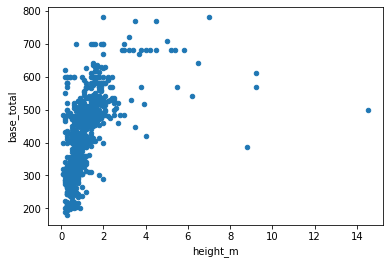

In [56]:
poke.plot.scatter(x = 'height_m', y = 'base_total')

In [61]:
poke[poke.name == 'Pidgey'].base_total

pokedex_number
16    251
Name: base_total, dtype: int64

After some visualizations and correlations i found that the most valuable statistic when it comes to strength of a pokemon (total stats) is their height. At first I was surprised but when i dove more into it i realized that a big reason for this may be due to the fact that there are many pokemon who have multiple evolutions in their pokemon line. These pokemon are generally much smaller and weaker. Now this doesnt affect the data per say but because they are all in the same evoltion line as other pokemon id rather try to find more accurate stats that can maybe take those into account. So now i have to figure out a good way to avoid this especially for pokemon with 2 higher level evolutions